In [12]:
import gym
from gym.envs.registration import register
register(
    id='D4x4-FrozenLake-v0',
    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': True})
env = gym.make('D4x4-FrozenLake-v0')

In [13]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import math
def fancy_visual(value_func,policy_int):    
    grid = 4
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped=np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap=cmap, vmax=1.1,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter=0
    for j in range(0, 4):
        for i in range(0, 4):
            if policy_int[counter]==1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif policy_int[counter]==3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif policy_int[counter]==0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function',value_func)
    print('Policy',policy_int)
    plt.show()

In [14]:
gamma = 0.9
def value_iter(V, P, nA, nS):
    new_V = [0]*nS
    policy = [0]*nS
    for s in range(nS):
        new_v = [0]*nA
        for a in range(nA):
            for prob, next_s, reward, terminal in P[s][a]:
                new_v[a] += prob * (reward + gamma * V[next_s])
        new_V[s] = max(new_v)
        policy[s] = np.argmax(new_v)
    return new_V, policy

def l2(a, b):
    s = 0
    for i in range(len(a)):
        s += (a[i]-b[i])**2
    return math.sqrt(s)

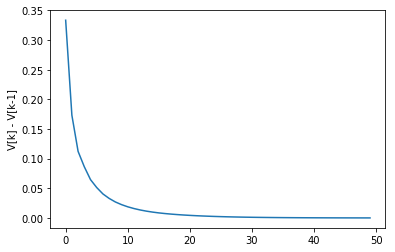

In [15]:
V = [0]*env.nS
policy = None

n_iter = 50
diff = []
for i in range(n_iter):
    new_V, policy = value_iter(V, env.P, env.nA, env.nS)
    diff.append(l2(V, new_V))
    V = new_V

plt.plot(diff)
plt.ylabel('V[k] - V[k-1]')
plt.show()

Value Function [0.06860931146981036, 0.06117598558046704, 0.07423578052404285, 0.055616067654591074, 0.09159845890433235, 0.0, 0.11211457609294517, 0.0, 0.1452290007595193, 0.2473571454305869, 0.2995191699167368, 0.0, 0.0, 0.37983495904910114, 0.6389672658762642, 0.0]
Policy [0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]


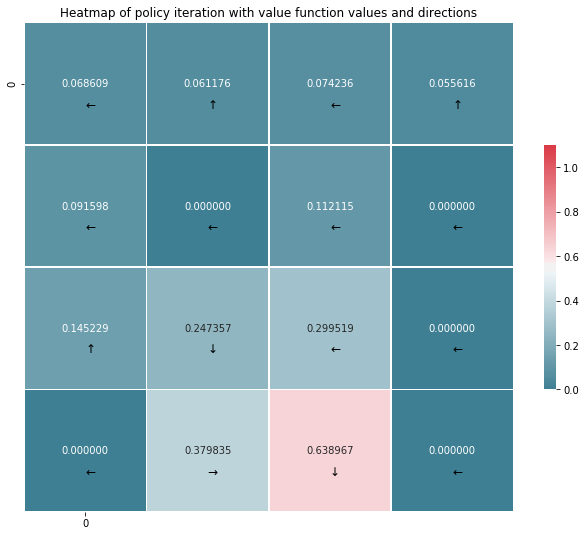


SFFF
FHFH
FFFH
HFFG


In [16]:
fancy_visual(V, policy)
env.render()

In [17]:
def q_func(V, P, nA, nS):
    q = np.zeros((nS, nA))
    for s in range(nS):
        for a in range(nA):
            for prob, next_s, reward, terminal in P[s][a]:
                q[s][a] += prob * (reward + gamma * V[next_s])
    return q

print('Optimal Q function')
q_func(V, env.P, env.nA, env.nS)

Optimal Q function


array([[0.06864512, 0.06641513, 0.06641513, 0.05951838],
       [0.03893559, 0.04285353, 0.04062353, 0.06120632],
       [0.0742579 , 0.06867199, 0.07258993, 0.05730835],
       [0.03895555, 0.03895555, 0.03336964, 0.05564037],
       [0.09163103, 0.07104824, 0.06415149, 0.04806233],
       [0.        , 0.        , 0.        , 0.        ],
       [0.11212649, 0.08985575, 0.11212649, 0.02227073],
       [0.        , 0.        , 0.        , 0.        ],
       [0.07104824, 0.11777584, 0.10168668, 0.14525538],
       [0.15751919, 0.24737494, 0.20380624, 0.13342445],
       [0.2995317 , 0.26589732, 0.22532455, 0.10784152],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.18815763, 0.30564067, 0.37984781, 0.26589732],
       [0.39549642, 0.638974  , 0.61487926, 0.53713957],
       [0.        , 0.        , 0.        , 0.        ]])